In [1]:
import os
import re
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# add gaugi by hand
sys.path.append('../../.__python__/')
from Gaugi import load as gload

# Open the file

The file here has only 1 initialization for each sort in each model.

In [2]:
base_path = '/volume'

In [3]:
cv_df = pd.read_csv(os.path.join(base_path, 'cv_table_v1.csv'))

In [4]:
cv_df.head()

,train_tag,et_bin,eta_bin,model_idx,sort,init,file_name,total_sgn,total_bkg,max_sp_val,max_sp_pd_val,max_sp_fa_val,auc_val,max_sp_op,max_sp_pd_op,max_sp_fa_op,auc_op
0,v1,0,0,0,0,46,tunedDiscr.jobID_0004.pic.gz,28455,205005,0.949406,0.963106,0.064195,0.982747,0.947130,0.959761,0.065418,0.982995
1,v1,0,0,0,1,25,tunedDiscr.jobID_0002.pic.gz,28455,205005,0.947411,0.962403,0.067463,0.981599,0.946596,0.957442,0.064189,0.982611
2,v1,0,0,0,2,24,tunedDiscr.jobID_0002.pic.gz,28455,205005,0.942160,0.945889,0.061561,0.980855,0.944615,0.958426,0.069096,0.982112
3,v1,0,0,0,3,9,tunedDiscr.jobID_0000.pic.gz,28455,205005,0.946431,0.963106,0.070098,0.982423,0.946478,0.962643,0.069550,0.983515
4,v1,0,0,0,4,37,tunedDiscr.jobID_0003.pic.gz,28455,205005,0.946725,0.962755,0.069171,0.981539,0.946067,0.961272,0.069018,0.983181


# Box plot analysis

Create a box plot to get an overview of all trained models and use the parsimony to choose the best model for each bin.

In [5]:
# set the real ranges in kinematic reagion
et_range = ['[4, 7[ GeV', '[7, 10[ GeV', '[10, 15[ GeV']
eta_range = ['[0.0, 0.8[', '[0.8, 1.37[', '[1.37, 1.54[', '[1.54, 2.37', '[2.37, 2.47[']

In [14]:
map_key_dict ={
   'max_sp_val'    : (r'$SP_{max}$ (Validation)', 'sp'),
   'max_sp_pd_val' : (r'$P_D$ (Validation)', 'pd'),
   'max_sp_fa_val' : (r'$F_A$ (Validation)', 'fa'),
   'auc_val'       : (r'AUC (Validation)', 'auc'),
}

# using as simple function in order to make easier plot all need measures
def create_cool_box_plot(df, key, mapped_key, output_name):
    # create the box plot. 
    # rename the columns names.
    # map the model idx into real # neurons.

    sns.factorplot(data=(df
                        .replace({'model_idx' : {i :  n for i, n in zip(range(0,10+1),
                        range(5,15+1))},
                                'et_bin'    : {i : et_range[i] for i in range(3)},
                                'eta_bin'   : {i : eta_range[i] for i in range(5)}})
                        .rename({'model_idx'  : '# Neurons',
                                'et_bin'     : r'$E_T$',
                                'eta_bin'    : r'$\eta$',
                                key : mapped_key},
                        axis=1)), x='# Neurons',
                        y=mapped_key, col=r'$\eta$', 
                        row=r'$E_T$', kind='box', sharey=False)

    plt.savefig(os.path.join(base_path, 'box_plot_%s.png' %(output_name)), dpi=300)

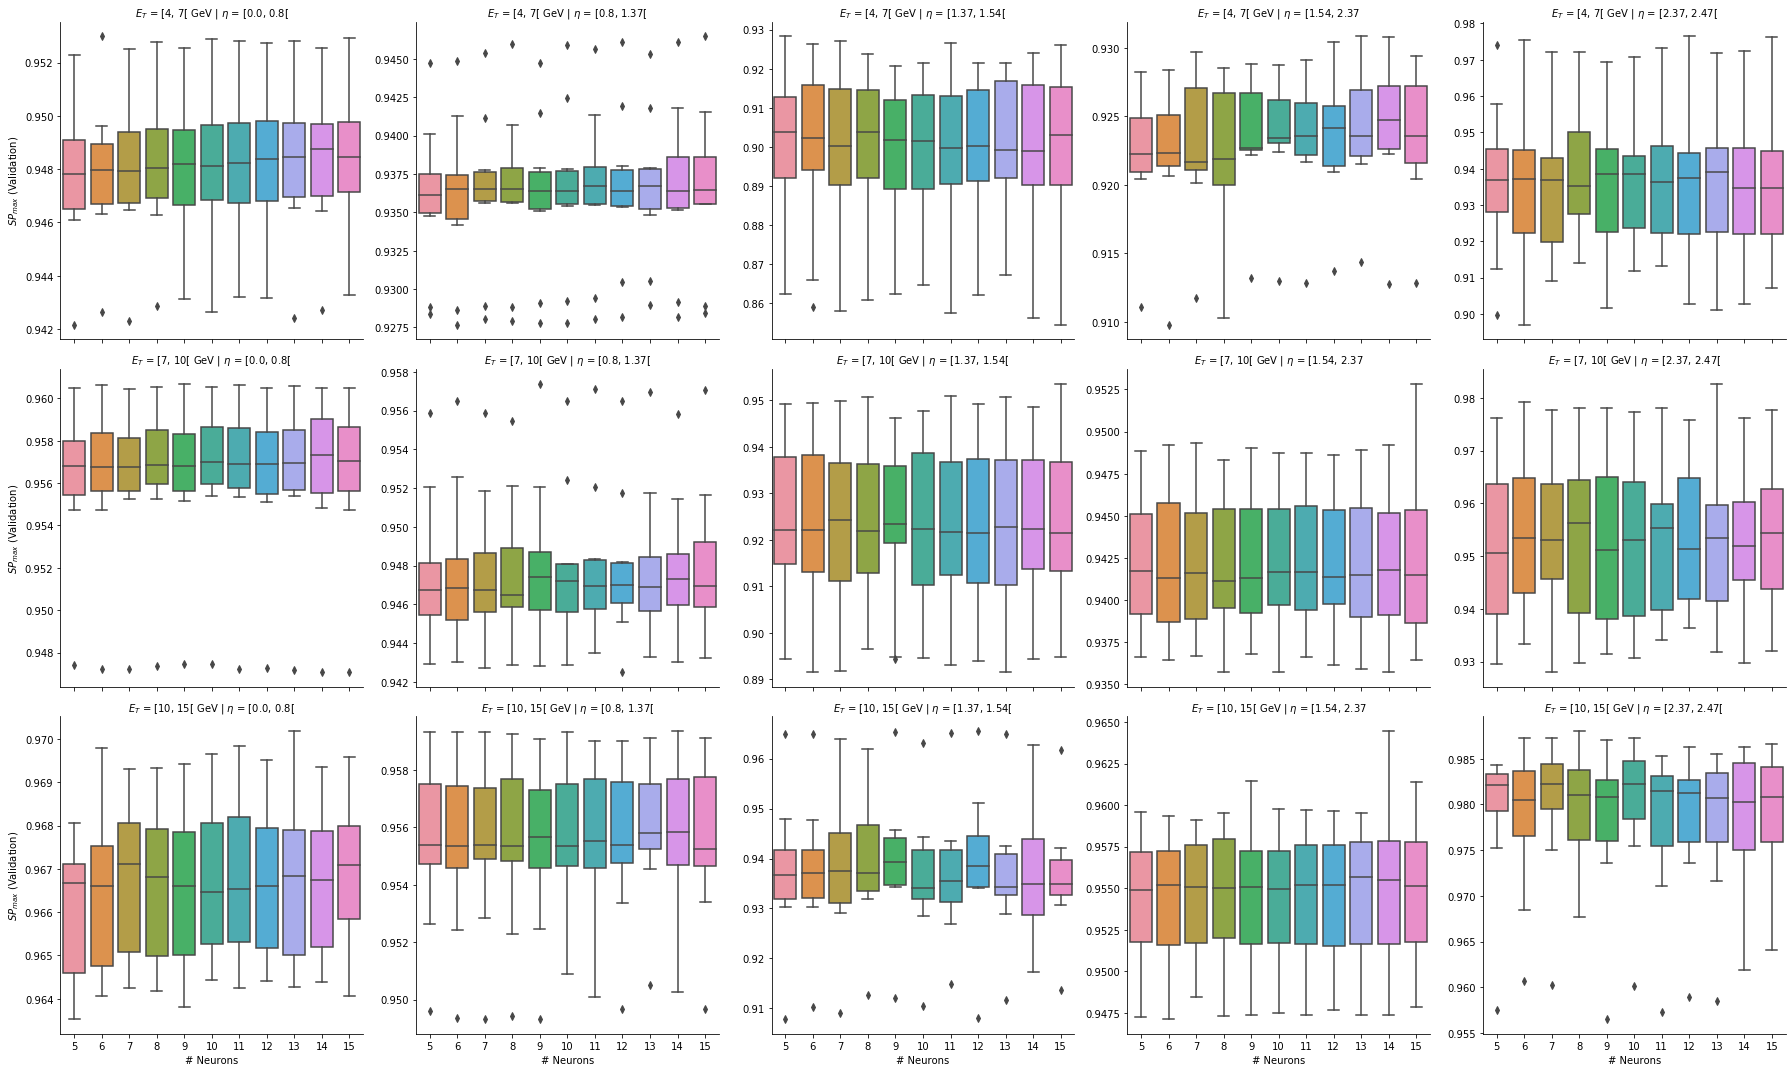

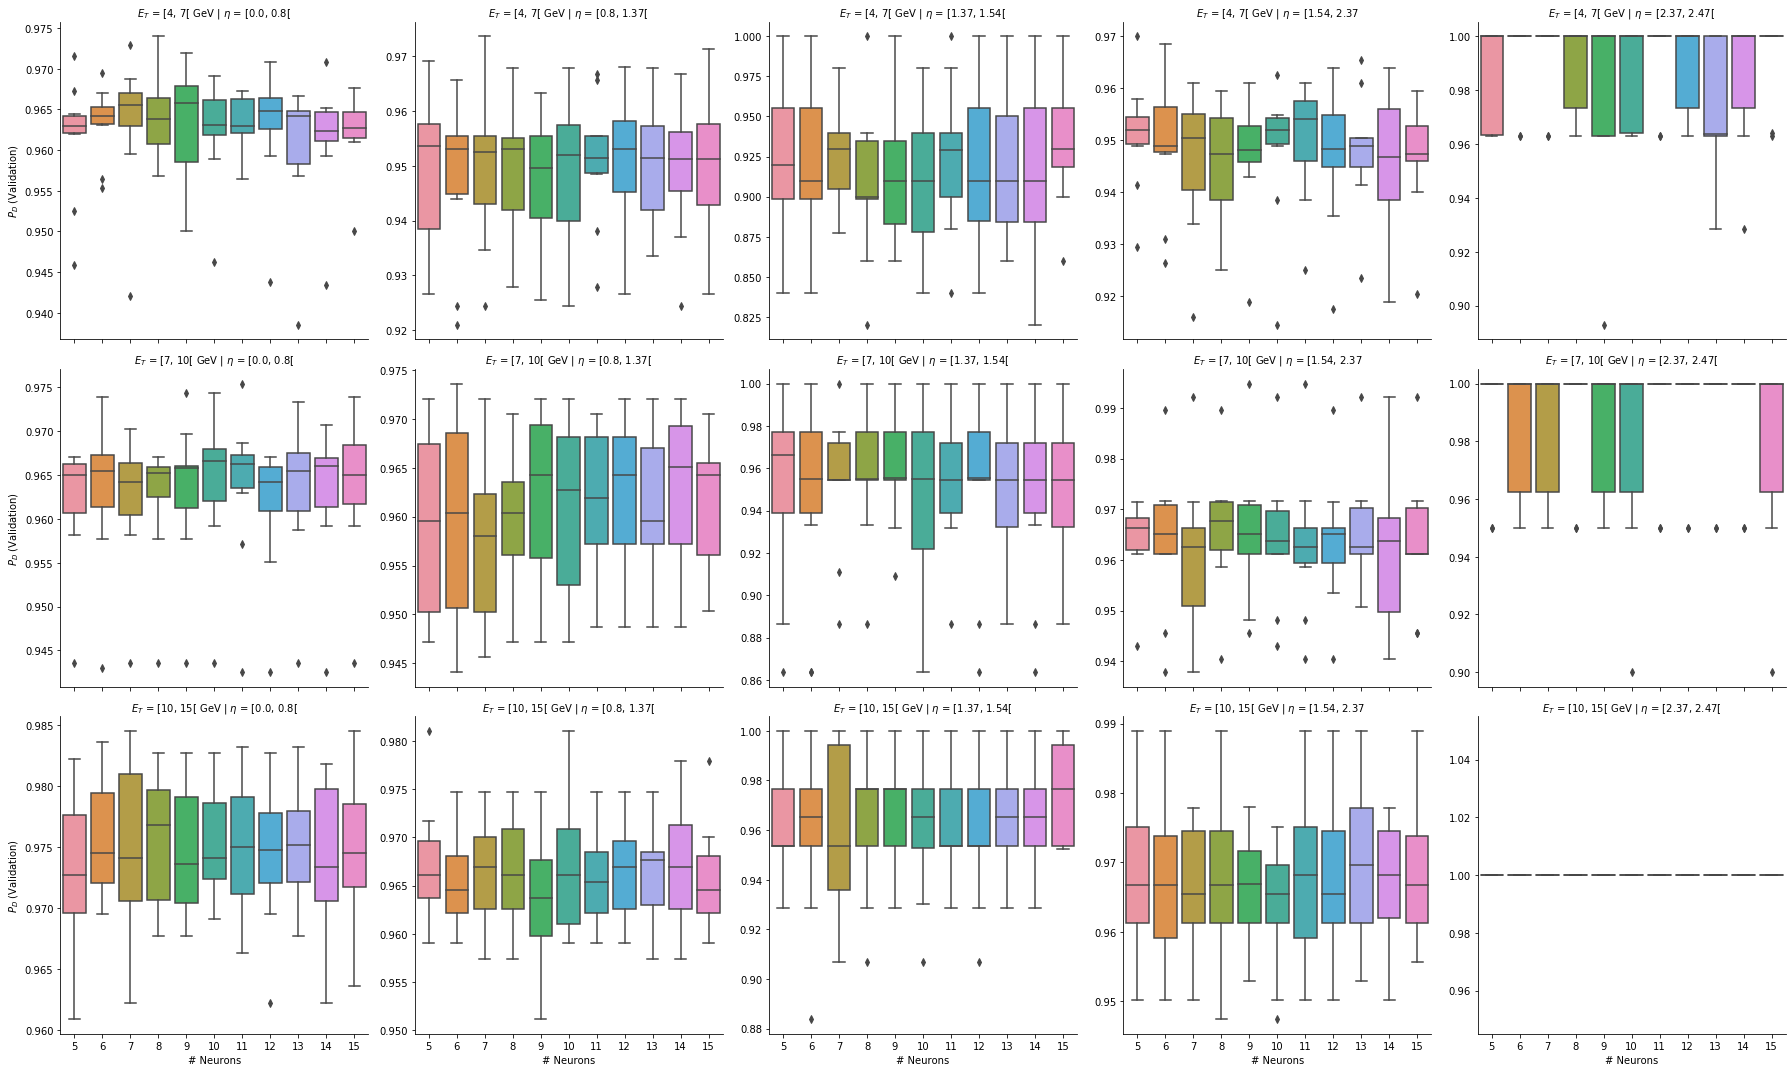

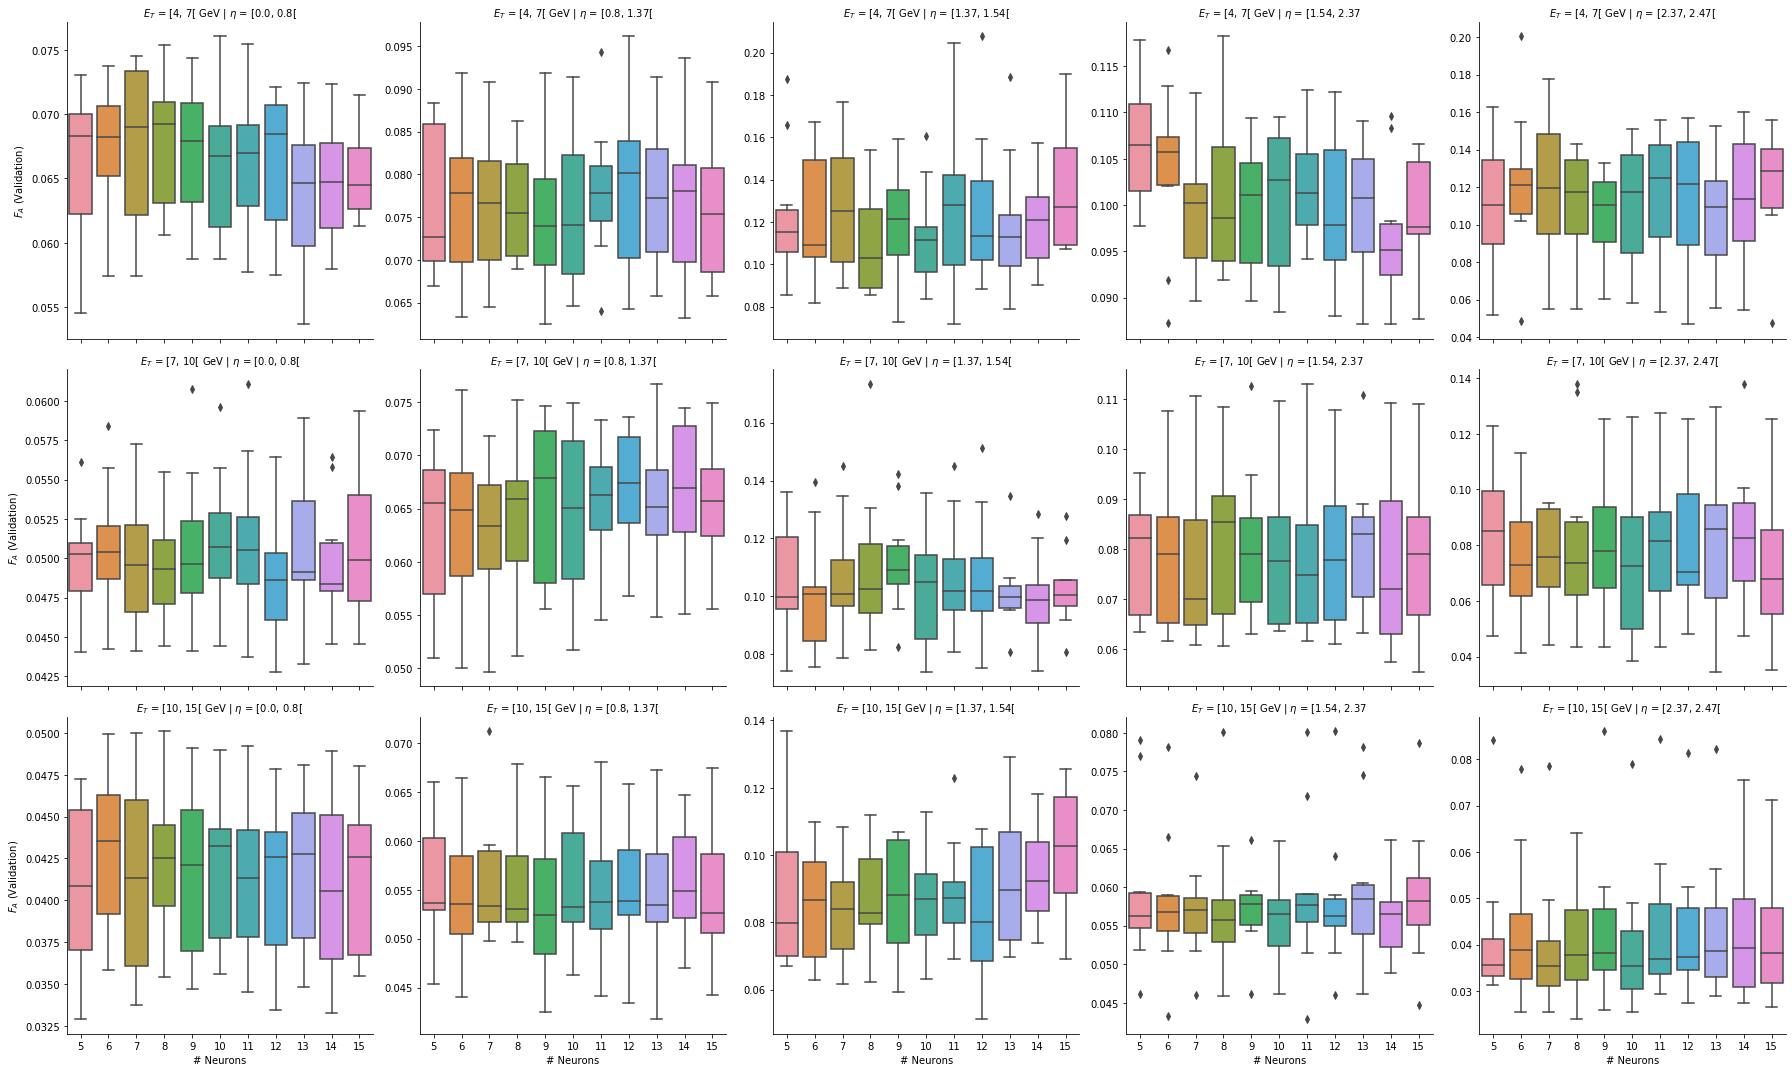

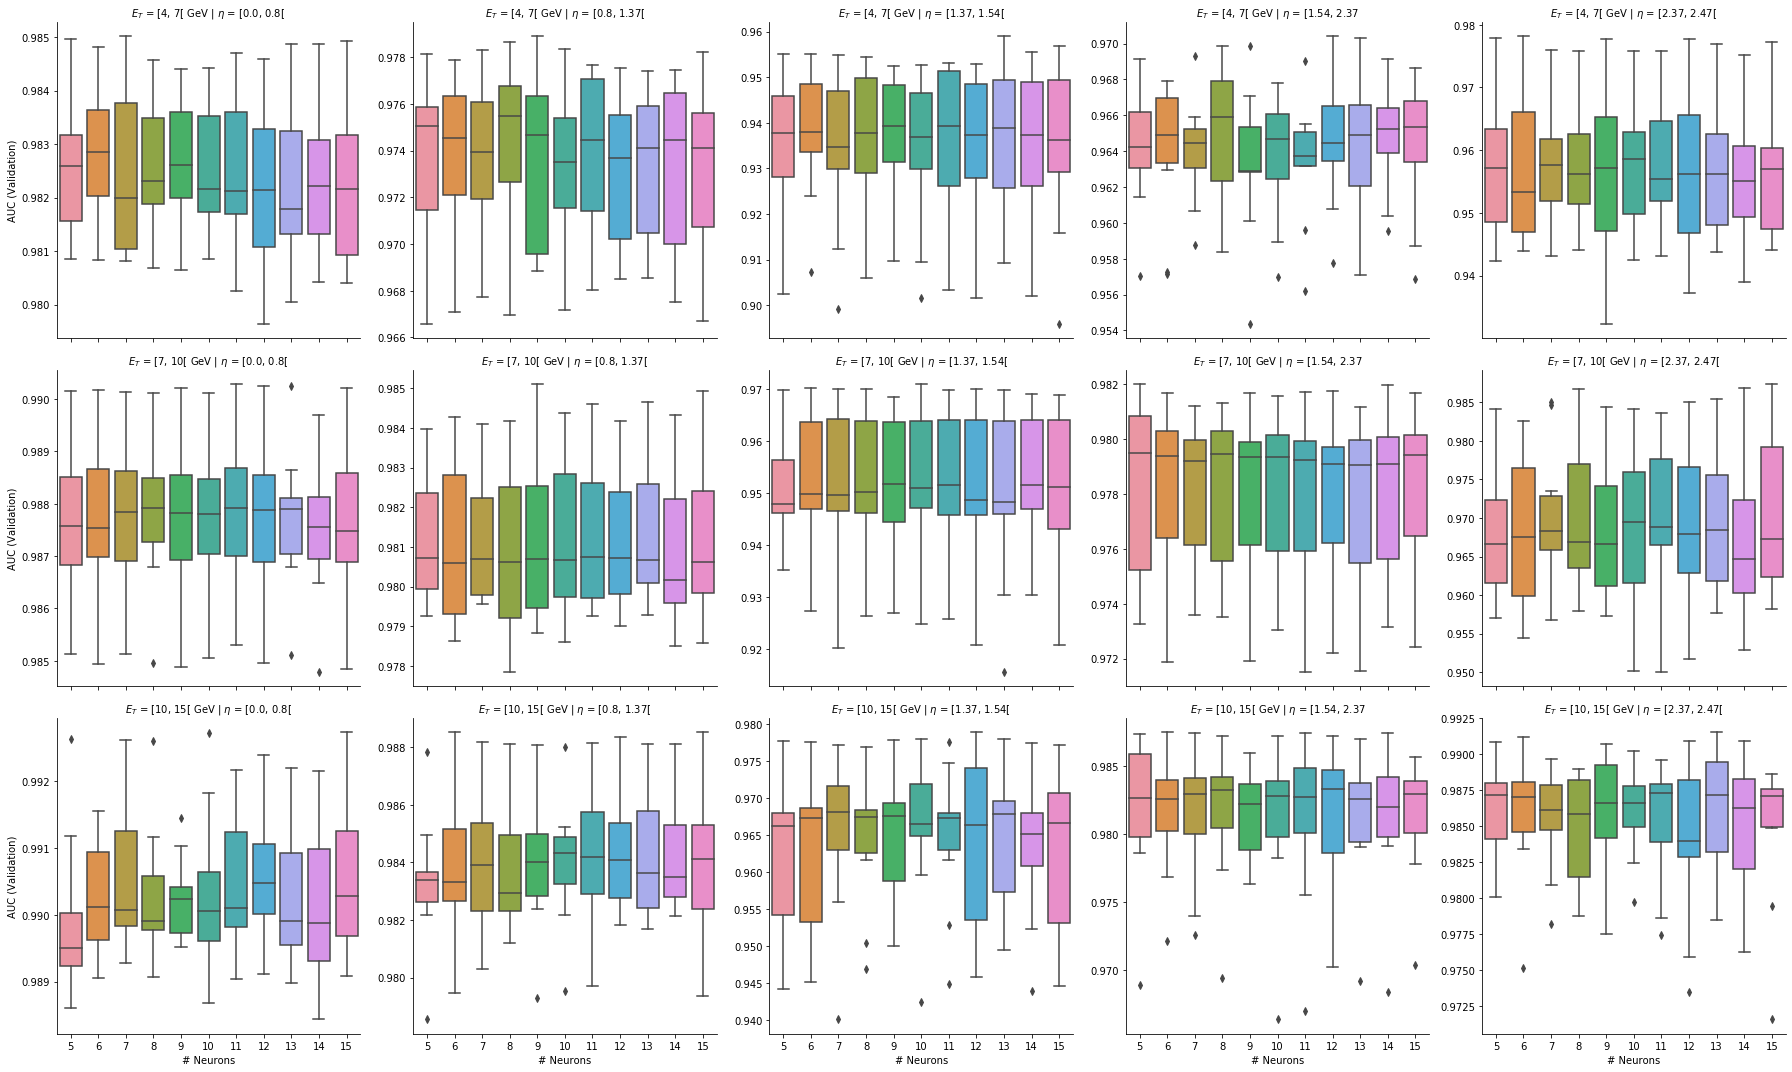

In [15]:
for ikey in map_key_dict.keys():
    map_k, o_name = map_key_dict[ikey]
    create_cool_box_plot(df=cv_df, key=ikey, mapped_key=map_k, output_name=o_name)

A good choice can ben $5$ or $6$ neurons, but using the $AUC$ a better choice in most of cases is $6$ neurons... So proceding using this model...

In [16]:
# filter to get only the model with 6 neurons
print('There are %i before filter the models...' %(len(cv_df)))
cv_df = cv_df.loc[cv_df.model_idx==1, :] # model_idx==1 is the model with 6 neurons...
print('There are %i before filter the models...' %(len(cv_df)))

There are 1650 before filter the models...
There are 150 before filter the models...
